In [3]:
import numpy as np 
import pandas as pd 
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [4]:
# Reading the data 
data = pd.read_csv("day.csv")

## Step 1: Understanding and exploration of the data 

In [5]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [6]:
data.shape 

(730, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Checking for duplicate records
data[data['instant'].duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [10]:
# Checking for duplicate records
data[data['dteday'].duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### Observation: 
- no duplicate entries in the data 

In [11]:
# Checking Missing values percentage in each columns
missing_column = []
missing_perc = []

for column in data.columns:
    missing_column.append(column)
    missing_perc.append((data[column].isna().sum()/len(data))*100)

missing_values= pd.DataFrame()
missing_values["missing_column"] = missing_column
missing_values["missing_perc"] = missing_perc
missing_values

,missing_column,missing_perc
0,instant,0.0
1,dteday,0.0
2,season,0.0
3,yr,0.0
4,mnth,0.0
5,holiday,0.0
6,weekday,0.0
7,workingday,0.0
8,weathersit,0.0
9,temp,0.0


In [12]:
# Observation: No missing values in the provided data 

In [13]:
data.dteday = pd.to_datetime(data.dteday, format = "%d-%m-%Y")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
data["day"] = pd.DatetimeIndex(data.dteday).day
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [15]:
# Dropping the unwanted columns 
# Instant only tells us about the sr no. This will not help us in prediction
# dteday is being removed as we have the year month and weekday information as separate columns
# Count is derived from Casual and Registered and hence omitting these
data.drop(["instant" , "dteday" , "casual" , "registered"] , axis=1 , inplace= True)

In [16]:
data['season']=data['season'].astype('category')
data['weathersit']=data['weathersit'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['weekday']=data['weekday'].astype('category')
data['holiday']=data['holiday'].astype('category')
data['workingday']=data['workingday'].astype('category')

In [17]:
#making a duplcate of the "data"
data_dup = data.copy()
data_dup.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [18]:
# Mapping the season , month , weekday , weathersit columns
data_dup.season = data_dup.season.map({1:"spring" , 2:"summer" , 3:"fall" , 4:"winter"})
data_dup.mnth = data_dup.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data_dup.weekday = data_dup.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data_dup.weathersit = data_dup.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [19]:
data_dup.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


In [20]:
data_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  day         730 non-null    int64   
dtypes: category(6), float64(4), int64(3)
memory usage: 45.6 KB


## Step 2: Data Visualisation

In [21]:
### Univariate Analysis

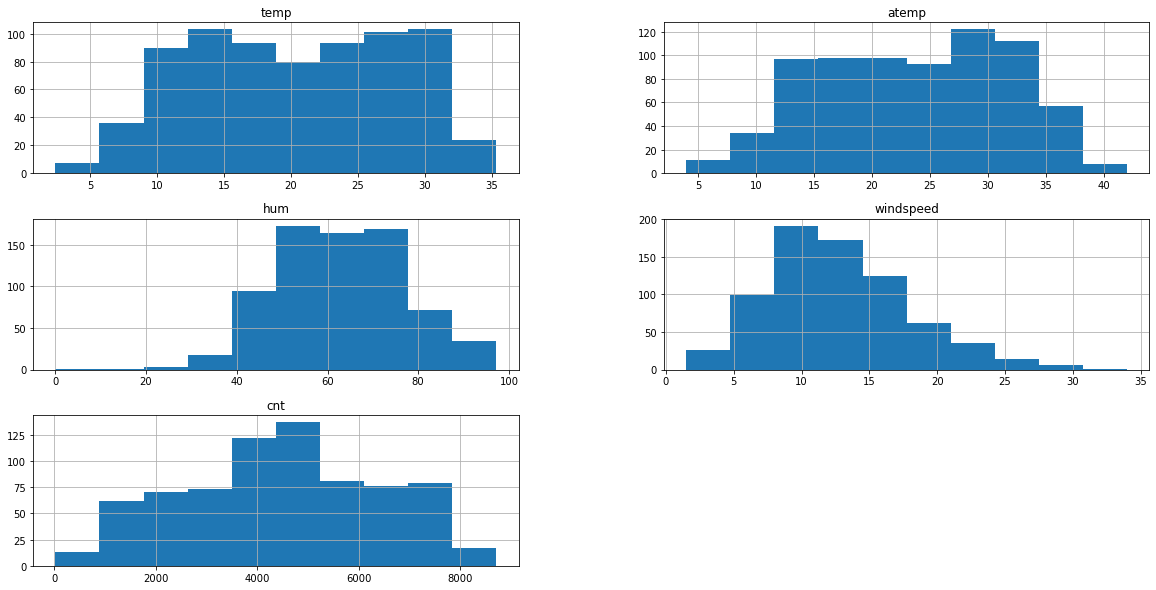

In [22]:
# Histogram of the numerical columns in the dataset
data_dup[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].hist(figsize = (20, 10));

#### observations
- Numerical variables appear to be normally distributed
- slight right skew observed in humidity and left sket in windspeed

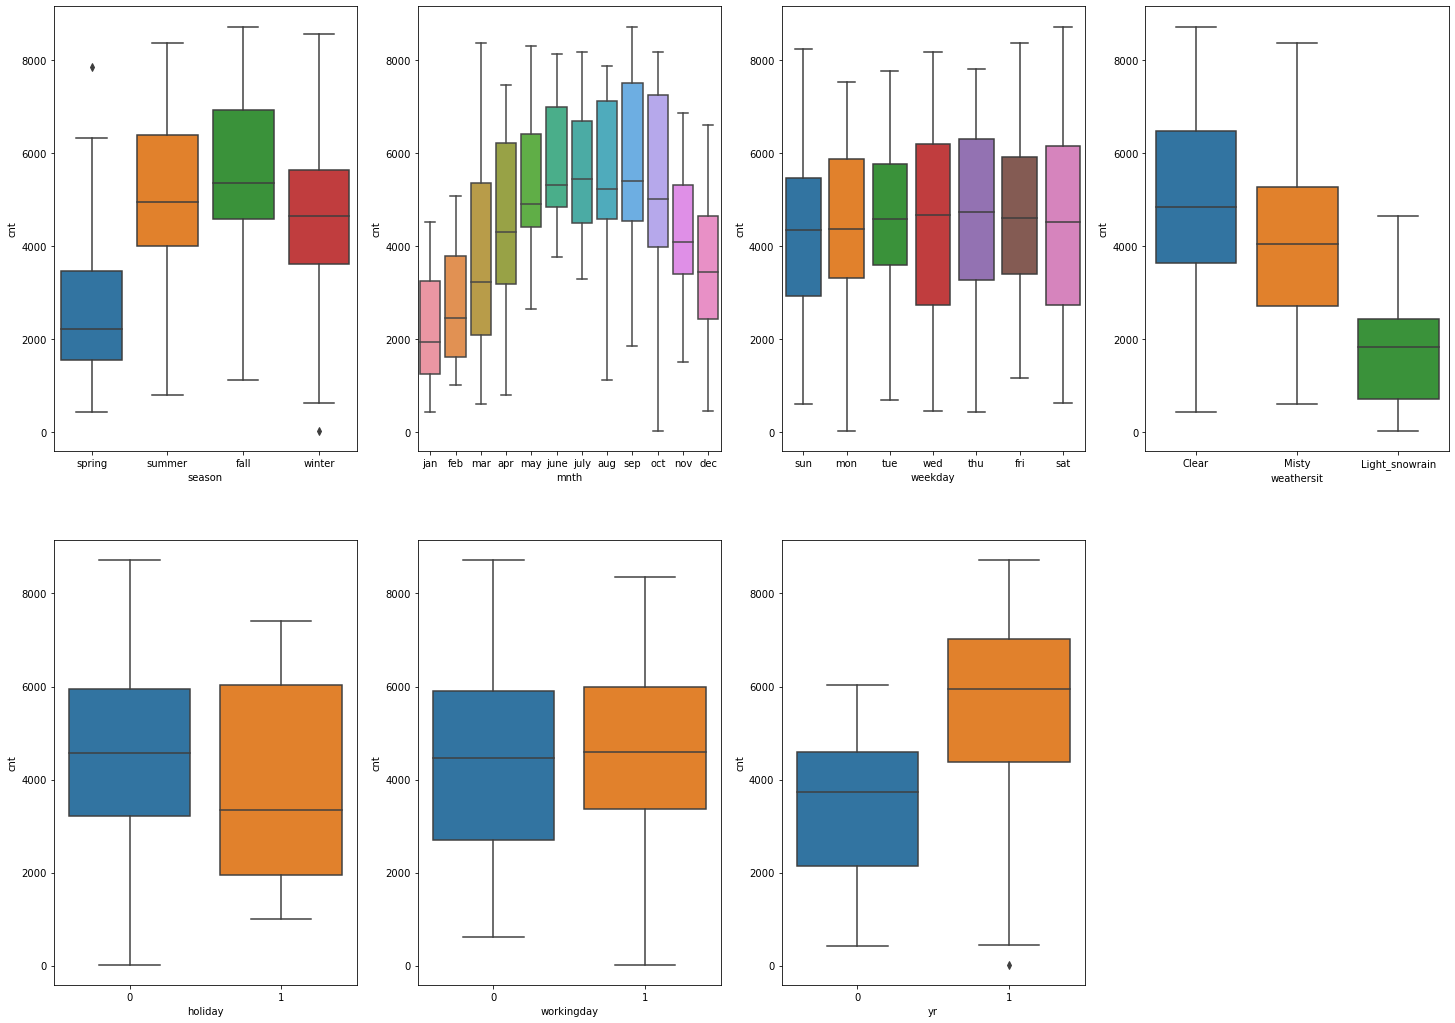

In [23]:
# Visualization of categorical data
plt.figure(figsize= (25,18))
plt.subplot(2,4,1)
sns.boxplot(x= "season" , y= "cnt" , data =  data_dup )
plt.subplot(2,4,2)
sns.boxplot(x= "mnth" , y= "cnt" , data =  data_dup )
plt.subplot(2,4,3)
sns.boxplot(x= "weekday" , y= "cnt" , data =  data_dup )
plt.subplot(2,4,4)
sns.boxplot(x= "weathersit" , y= "cnt" , data =  data_dup )
plt.subplot(2,4,5)
sns.boxplot(x= "holiday" , y= "cnt" , data =  data_dup )
plt.subplot(2,4,6)
sns.boxplot(x= "workingday" , y= "cnt" , data =  data_dup )
plt.subplot(2,4,7)
sns.boxplot(x= "yr" , y= "cnt" , data =  data_dup )
plt.show()


In [24]:
cat_var = ['season', 'mnth', 'weekday', 'weathersit', 'holiday', 'workingday']
for each_variable in cat_var:
    df1 = data_dup.groupby(each_variable).agg(sum_cnt=('cnt', 'sum'), mean_cnt=('cnt', 'mean')).reset_index()
    sum1 = df1['sum_cnt'].sum()
    df1['record %'] = df1['sum_cnt'].apply(lambda x : (x/sum1)*100)
    print("Variable : ", each_variable )
    print(df1)
    print("***********************")

Variable :  season
   season  sum_cnt     mean_cnt   record %
0  spring   469514  2608.411111  14.267278
1  summer   918589  4992.331522  27.913469
2    fall  1061129  5644.303191  32.244879
3  winter   841613  4728.162921  25.574374
***********************
Variable :  mnth
    mnth  sum_cnt     mean_cnt   record %
0    jan   134933  2176.338710   4.100254
1    feb   149518  2669.964286   4.543453
2    mar   228920  3692.258065   6.956268
3    apr   269094  4484.900000   8.177049
4    may   331686  5349.774194  10.079053
5   june   346342  5772.366667  10.524409
6   july   344948  5563.677419  10.482049
7    aug   351194  5664.419355  10.671849
8    sep   345991  5766.516667  10.513743
9    oct   322352  5199.225806   9.795417
10   nov   254831  4247.183333   7.743634
11   dec   211036  3403.806452   6.412821
***********************
Variable :  weekday
  weekday  sum_cnt     mean_cnt   record %
0     sun   444027  4228.828571  13.492796
1     mon   455503  4338.123810  13.841521
2     

### Observations

Box plot on categorical variables have been plotted to understand the effect

Below are the observations:
* season: Almost 32% of the bike booking were happening in Fall with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter with 27% & 25% of total booking. This shows that season can be a good predictor for the dependent variable.

* mnth: Almost 10% of the bike booking were happening in the months from may to sep with a median of over 4000 booking per month. This indicates, mnth has some trend with no of bookings and hence can be a good predictor 

* weathersit: Almost 67% of the bike booking were happening during ‘Clear' weather with a median of close to 5000 booking (for the period of 2 years). This was followed by Misty weather with 30% of total booking. This indicates, weathersit has some trend with bookings and hence can be a good predictor

* holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. Therefore, holiday CANNOT be a good predictor for the dependent variable.

* weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. We will let the model decide if this needs to be added or not.

* workingday: Almost 69% of the bike booking were happening when it was a working day with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### Bivariate Analysis

<AxesSubplot:xlabel='day', ylabel='cnt'>

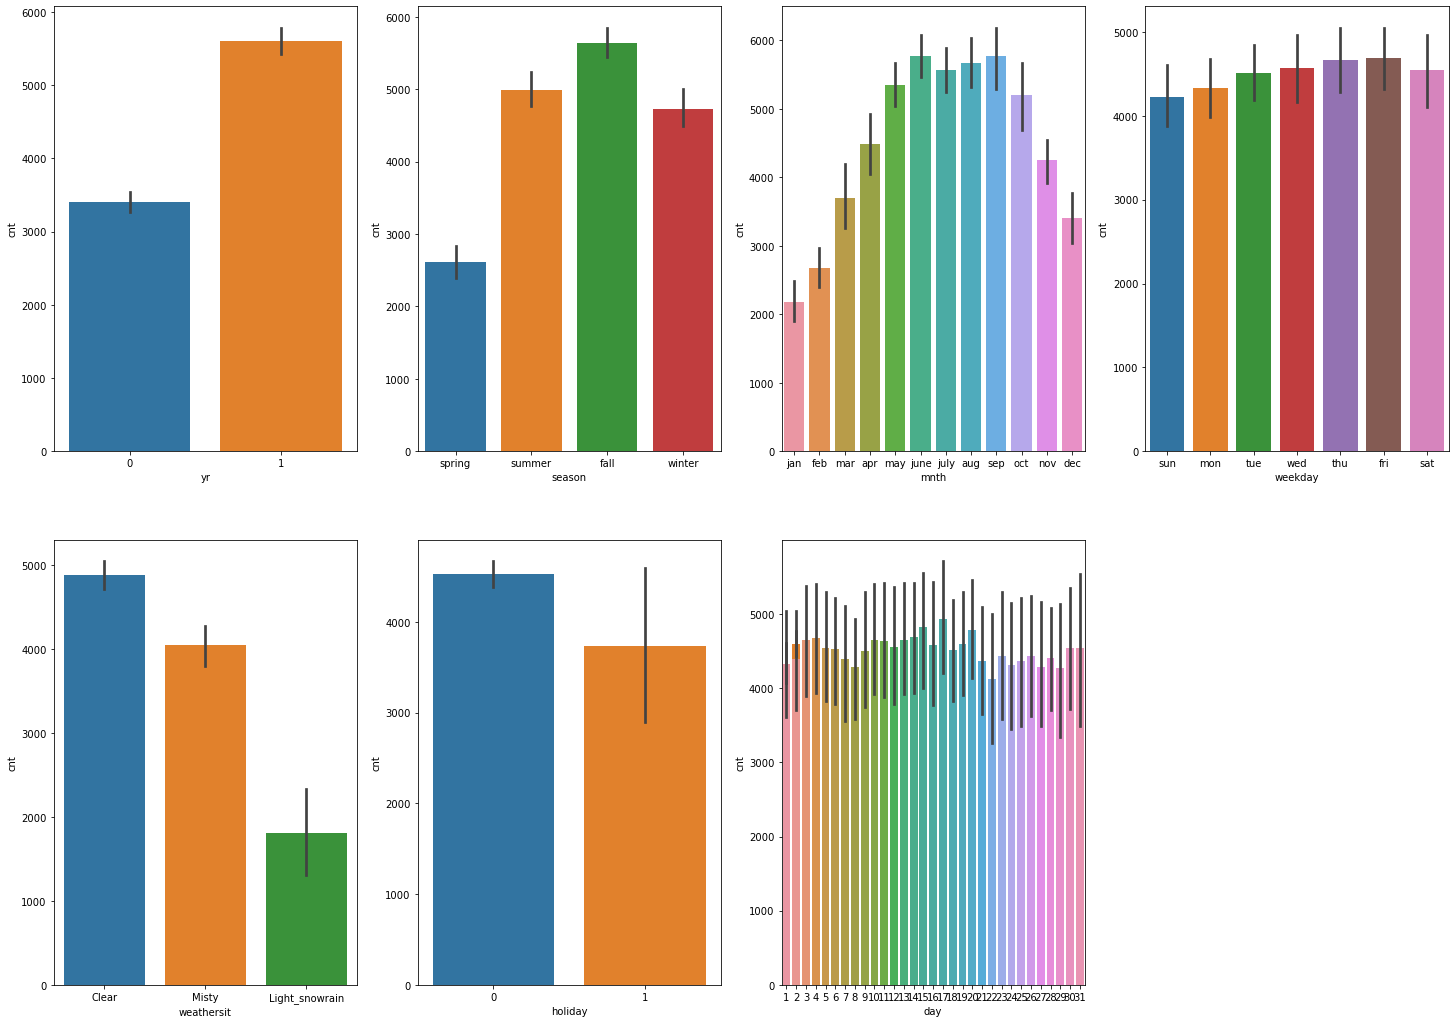

In [25]:
plt.figure(figsize= (25,18))
plt.subplot(2 , 4 , 1)
sns.barplot( "yr" , "cnt" , data = data_dup )
plt.subplot(2 , 4 , 2)
sns.barplot("season" , "cnt" , data = data_dup)
plt.subplot(2 , 4 , 3)
sns.barplot("mnth" , "cnt" , data = data_dup )
plt.subplot(2 , 4 , 4)
sns.barplot("weekday" , "cnt" , data = data_dup)
plt.subplot(2 , 4 , 5)
sns.barplot("weathersit" , "cnt" , data = data_dup)
plt.subplot(2 , 4 , 6)
sns.barplot("holiday" , "cnt" , data = data_dup)
plt.subplot(2 , 4 , 7)
sns.barplot("workingday" , "cnt" , data = data_dup)
plt.subplot(2 , 4 , 7)
sns.barplot("day" , "cnt" , data = data_dup)

#### Observations
- 2019 has more data as compared to 2018
- Rentals are higher in falls eason
- jan to april - rentals are on lower side , may-sep we can see a rise in rentals and it again goes down for the rest of the months
- weekends and monday have a lower rentals as compared to other days
- rentals are high during clear season, followed by Misty
- rentals are higher when it is not a holiday and when it is a working day

<AxesSubplot:xlabel='day', ylabel='cnt'>

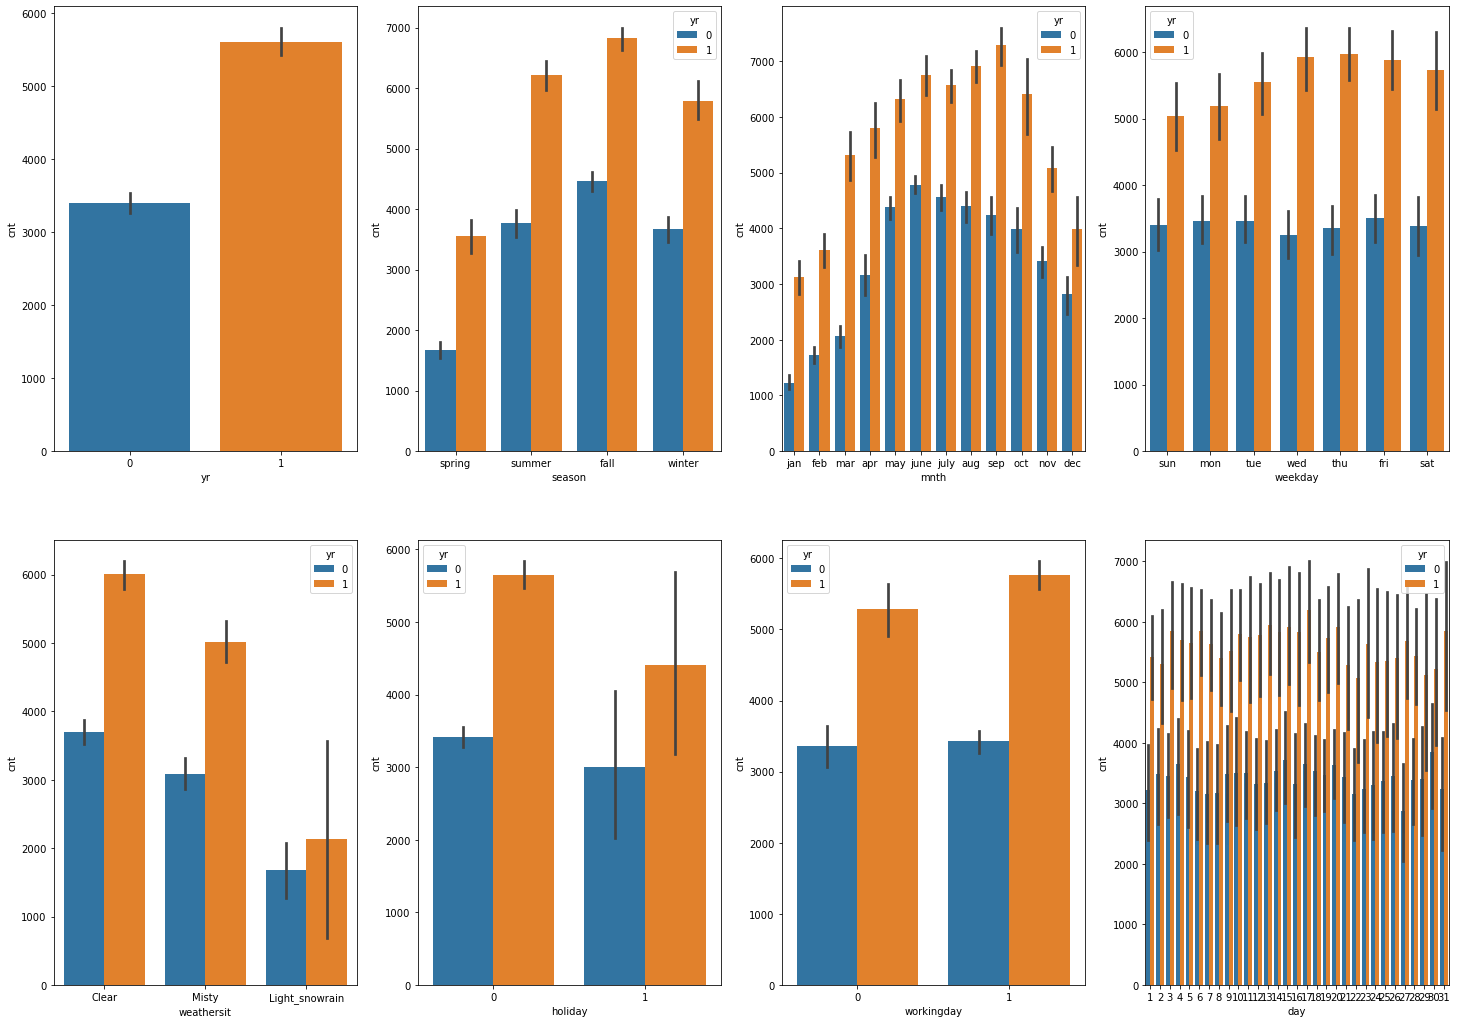

In [26]:
plt.figure(figsize= (25,18))
plt.subplot(2 , 4 , 1)
sns.barplot( "yr" , "cnt" , data = data_dup )
plt.subplot(2 , 4 , 2)
sns.barplot("season" , "cnt" , data = data_dup , hue = "yr" )
plt.subplot(2 , 4 , 3)
sns.barplot("mnth" , "cnt" , data = data_dup , hue = "yr" )
plt.subplot(2 , 4 , 4)
sns.barplot("weekday" , "cnt" , data = data_dup , hue = "yr" )
plt.subplot(2 , 4 , 5)
sns.barplot("weathersit" , "cnt" , data = data_dup , hue = "yr" )
plt.subplot(2 , 4 , 6)
sns.barplot("holiday" , "cnt" , data = data_dup , hue = "yr" )
plt.subplot(2 , 4 , 7)
sns.barplot("workingday" , "cnt" , data = data_dup , hue = "yr")
plt.subplot(2 , 4 , 8)
sns.barplot("day" , "cnt" , data = data_dup , hue = "yr")

#### Observations
- Fall in both years have the highest number of rentals
- in 2018, June has the highest rentals and in 2019 - september has the highest rentals
- Rentals seem to be higher on Wednesdays to Saturday in 2019
- Rentals are more when the weather is clear
- Rentals are higher when it is not a holiday
- Retals are high on working daysObservations
- 2019 has more business compared to 2018. 

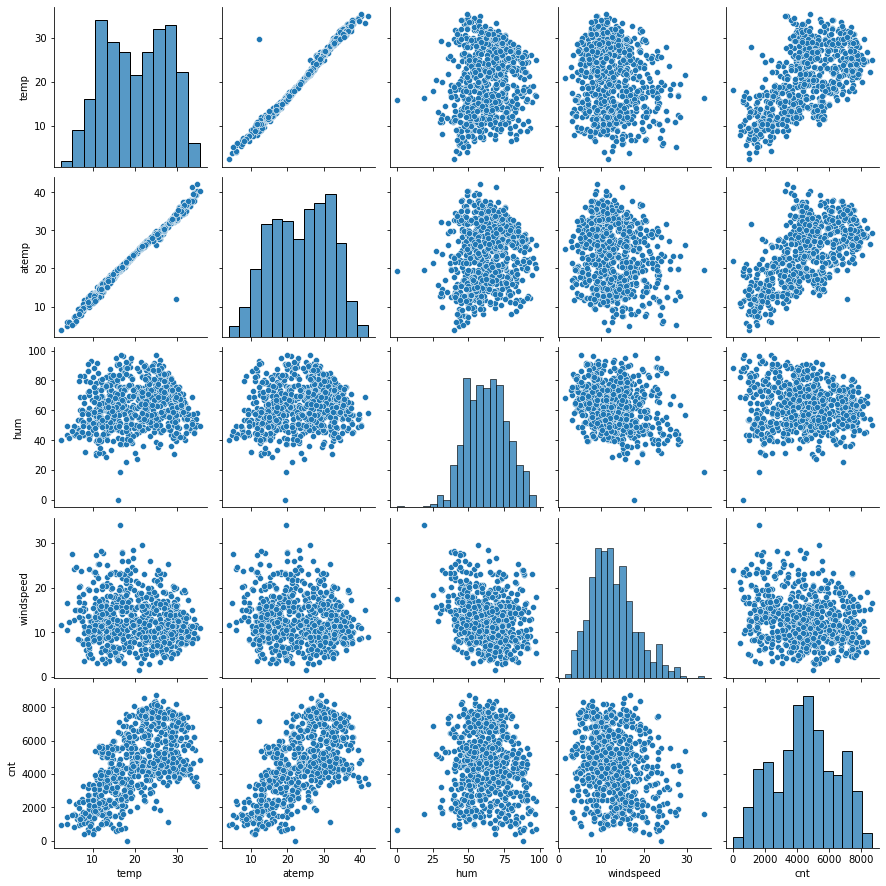

In [27]:
# Pairplots
sns.pairplot(data=data_dup , vars=["temp" , "atemp" , "hum" , "windspeed" , "cnt"])
plt.show()

#### Observations
- temp and atemp show a linear relationship
- temp and target variable 'cnt' show some level of linear relationshiop
- atemp and target variable 'cnt' show some level of linear relationshio

<AxesSubplot:>

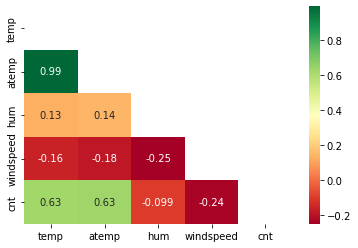

In [28]:
matrix = np.triu(data_dup[["temp" , "atemp" , "hum" , "windspeed" , "cnt"]].corr())
sns.heatmap(data_dup[["temp" , "atemp" , "hum" , "windspeed" , "cnt"]].corr() , annot = True , cmap = "RdYlGn" , mask = matrix )

#### Observations
- atemp and temp  - strong positive correlation - 0.99 
- Both of the parameters cannot be used in the model due to multicolinearity. 
- We will decide which parameters to keep based on VIF and p-value w.r.t other variables
- workingday 

## Step:3 Data Preparation 

In [29]:
def month_first_20(data):
    list1 = []
    for each in data.day:
        if each <=20:
            list1.append(1)
        else:
            list1.append(0)
    return list1

def month_last_10(data):
    list1 = []
    for each in data.day:
        if (each > 20):
            list1.append(1)
        else:
            list1.append(0)
    return list1

data_dup["month_first_20"] = month_first_20(data_dup)
data_dup["month_last_10"] =month_last_10(data_dup)

In [30]:
# Dummy variable creations for the below for columns 
month_df = pd.get_dummies(data_dup.mnth , drop_first = True)
weekday_df = pd.get_dummies(data_dup.weekday , drop_first = True)
weathersit_df = pd.get_dummies(data_dup.weathersit , drop_first = True)
season_df = pd.get_dummies(data_dup.season , drop_first = True) 

In [31]:
data_dup.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,month_first_20,month_last_10
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,1,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,2,1,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3,1,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4,1,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5,1,0


In [32]:
df_new = pd.concat([data_dup,month_df,weekday_df,weathersit_df,season_df ], axis=1)

In [33]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,1,0,0,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,0,0,0


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          730 non-null    category
 1   yr              730 non-null    int64   
 2   mnth            730 non-null    category
 3   holiday         730 non-null    category
 4   weekday         730 non-null    category
 5   workingday      730 non-null    category
 6   weathersit      730 non-null    category
 7   temp            730 non-null    float64 
 8   atemp           730 non-null    float64 
 9   hum             730 non-null    float64 
 10  windspeed       730 non-null    float64 
 11  cnt             730 non-null    int64   
 12  day             730 non-null    int64   
 13  month_first_20  730 non-null    int64   
 14  month_last_10   730 non-null    int64   
 15  feb             730 non-null    uint8   
 16  mar             730 non-null    uint8   
 17  apr             

In [35]:
#Dropping unnecessary columns
df_new.drop(["season","mnth","weekday","weathersit"] , axis = 1 , inplace= True)

In [36]:
df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day', 'month_first_20', 'month_last_10', 'feb', 'mar', 'apr',
       'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon', 'tue',
       'wed', 'thu', 'fri', 'sat', 'Misty', 'Light_snowrain', 'summer', 'fall',
       'winter'],
      dtype='object')

In [37]:
df_new.shape

(730, 33)

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   yr              730 non-null    int64   
 1   holiday         730 non-null    category
 2   workingday      730 non-null    category
 3   temp            730 non-null    float64 
 4   atemp           730 non-null    float64 
 5   hum             730 non-null    float64 
 6   windspeed       730 non-null    float64 
 7   cnt             730 non-null    int64   
 8   day             730 non-null    int64   
 9   month_first_20  730 non-null    int64   
 10  month_last_10   730 non-null    int64   
 11  feb             730 non-null    uint8   
 12  mar             730 non-null    uint8   
 13  apr             730 non-null    uint8   
 14  may             730 non-null    uint8   
 15  june            730 non-null    uint8   
 16  july            730 non-null    uint8   
 17  aug             

## Step:4 Splitting the data into training and test sets

In [65]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train , df_test = train_test_split(df_new , train_size = 0.7 , random_state = 100)

In [66]:
df_train.shape

(510, 33)

In [67]:
df_test.shape

(220, 33)

In [68]:
#Using minmaxscaler for scaling purpose
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
df_train.head() #Before appling scaling 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,month_first_20,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,31,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,3,1,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,30,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,28,0,...,0,0,0,0,1,1,0,1,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,22,0,...,0,0,0,1,0,1,0,1,0,0


In [71]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ["temp" , "atemp" , "windspeed" , "cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [72]:
df_train.head()#After scaling 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,month_first_20,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
576,1,0,1,0.815169,0.766351,70.4167,0.264686,0.827658,31,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,62.1250,0.255342,0.465255,3,1,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0,0.245101,0.200348,48.3333,0.663106,0.204096,30,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,48.9583,0.188475,0.482973,28,0,...,0,0,0,0,1,1,0,1,0,0
111,0,0,1,0.345824,0.318819,72.9583,0.380981,0.191095,22,0,...,0,0,0,1,0,1,0,1,0,0


In [73]:
df_train.describe()

,yr,temp,atemp,hum,windspeed,cnt,day,month_first_20,month_last_10,feb,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537440,0.513156,63.123710,0.320883,0.513499,15.592157,0.654902,0.345098,0.066667,...,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412,0.247059,0.262745,0.247059
std,0.500429,0.225858,0.212410,14.153170,0.169803,0.224421,8.911833,0.475867,0.475867,0.249689,...,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124,0.431725,0.440557,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,52.270825,0.199179,0.356420,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.542596,0.529718,63.437500,0.296763,0.518638,16.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.688457,73.250025,0.414447,0.684710,23.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,97.041700,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


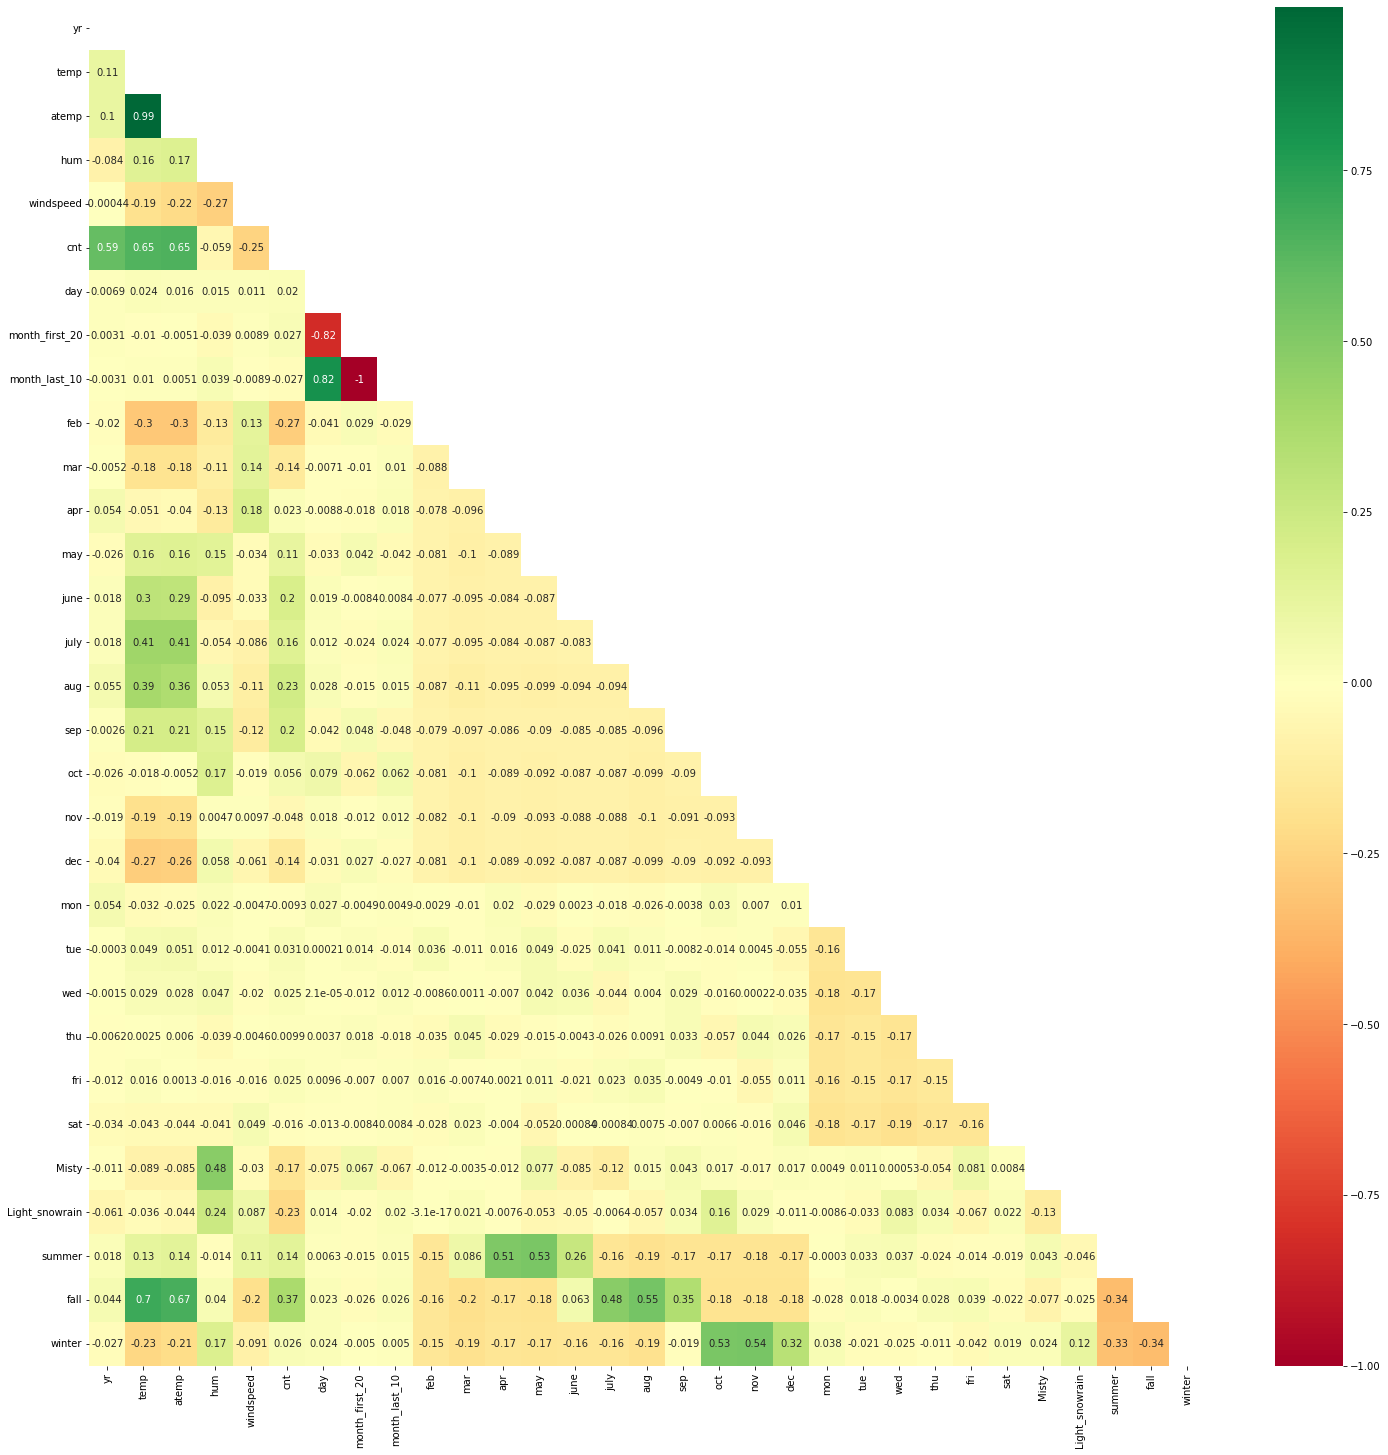

In [74]:
# Checking for the correlation 
plt.figure(figsize = (25 , 25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr() , annot = True , cmap="RdYlGn" , mask = matrix)
plt.show()

Observation 
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

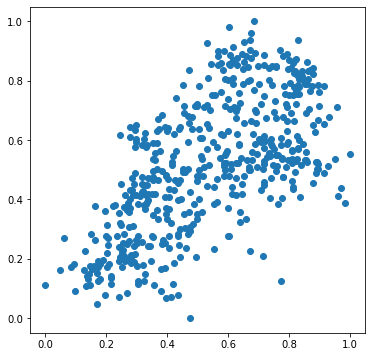

In [75]:
plt.figure(figsize=[6,6])
plt.scatter(df_train["temp"], df_train["cnt"])
plt.show()
#Visualization confirms the positive correlation between temp and cnt.

## Step:5 Feature Engineering

In [76]:
# Building the linear model 
y_train = df_train.pop("cnt")
X_train = df_train

In [77]:
# Importing RFE and linear regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [78]:
lm = LinearRegression()
lm.fit(X_train , y_train)

rfe = RFE(lm , step=20)
rfe = rfe.fit(X_train , y_train)

In [79]:
# list of variables selected in top 15 list 
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('day', False, 2),
 ('month_first_20', False, 2),
 ('month_last_10', False, 2),
 ('feb', False, 2),
 ('mar', True, 1),
 ('apr', True, 1),
 ('may', True, 1),
 ('june', True, 1),
 ('july', False, 2),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 2),
 ('dec', False, 2),
 ('mon', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('thu', False, 2),
 ('fri', False, 2),
 ('sat', True, 1),
 ('Misty', True, 1),
 ('Light_snowrain', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1)]

In [80]:
# # selecting the selected variable via RFE in col list 
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'temp', 'atemp', 'windspeed', 'mar', 'apr', 'may', 'june', 'aug',
       'sep', 'oct', 'sat', 'Misty', 'Light_snowrain', 'summer', 'winter'],
      dtype='object')


In [81]:
# # checking which columns are not selected
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'hum', 'day', 'month_first_20',
       'month_last_10', 'feb', 'july', 'nov', 'dec', 'mon', 'tue', 'wed',
       'thu', 'fri', 'fall'],
      dtype='object')

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [83]:
# Generic function to calculate VIF of variables
def calculateVIF(df_new):
    vif = pd.DataFrame()
    vif['Features'] = df_new.columns
    vif['VIF'] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [84]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [85]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,376.26
2,atemp,363.63
14,summer,6.21
6,may,3.62
3,windspeed,3.60
5,apr,3.33
7,june,2.43
15,winter,2.10
0,yr,2.03
8,aug,1.87


## Step 6 : Building a linear model

In [86]:
import statsmodels.api as sm

In [87]:
# temp and atemp are highly correlated with each other
X_train_new = X_train_rfe.drop(["atemp"] , axis = 1)

#Calculating VIF of new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,6.66
13,summer,6.20
5,may,3.62
2,windspeed,3.49
4,apr,3.32
6,june,2.42
14,winter,2.04
0,yr,2.03
7,aug,1.82
3,mar,1.65


In [88]:
X_train_lm_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train , X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.16e-182
Time:                        18:10:18   Log-Likelihood:                 497.94
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     494   BIC:                            -896.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1215      0.017      6.

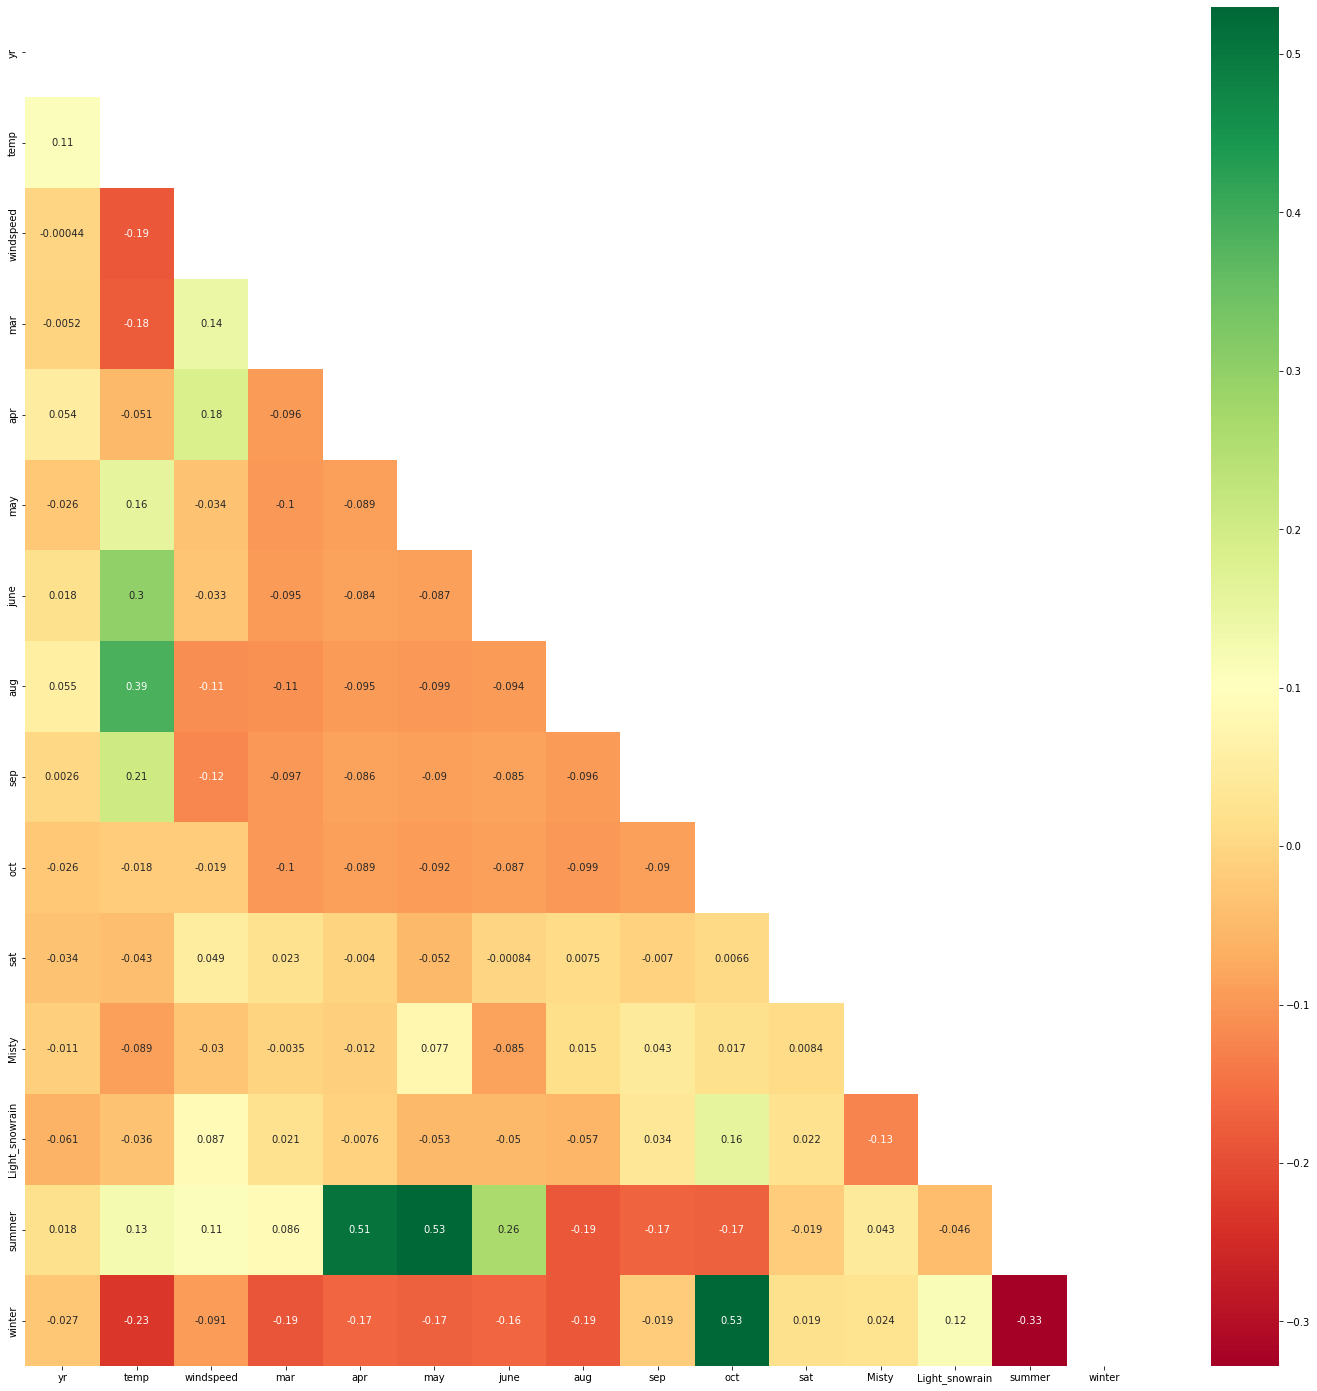

In [89]:
# Checking for the correlation 
plt.figure(figsize = (25 , 25))
matrix = np.triu(X_train_new.corr())
sns.heatmap(X_train_new.corr() , annot = True , cmap="RdYlGn" , mask = matrix)
plt.show()

In [90]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['summer'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,6.65
2,windspeed,3.49
13,winter,2.04
0,yr,2.03
7,aug,1.82
9,oct,1.60
6,june,1.58
11,Misty,1.50
5,may,1.48
8,sep,1.45


In [91]:
# Building 2nd linear regression model 
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train , X_train_lm_2 ).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.56e-181
Time:                        18:10:35   Log-Likelihood:                 492.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     495   BIC:                            -892.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1224      0.018      6.

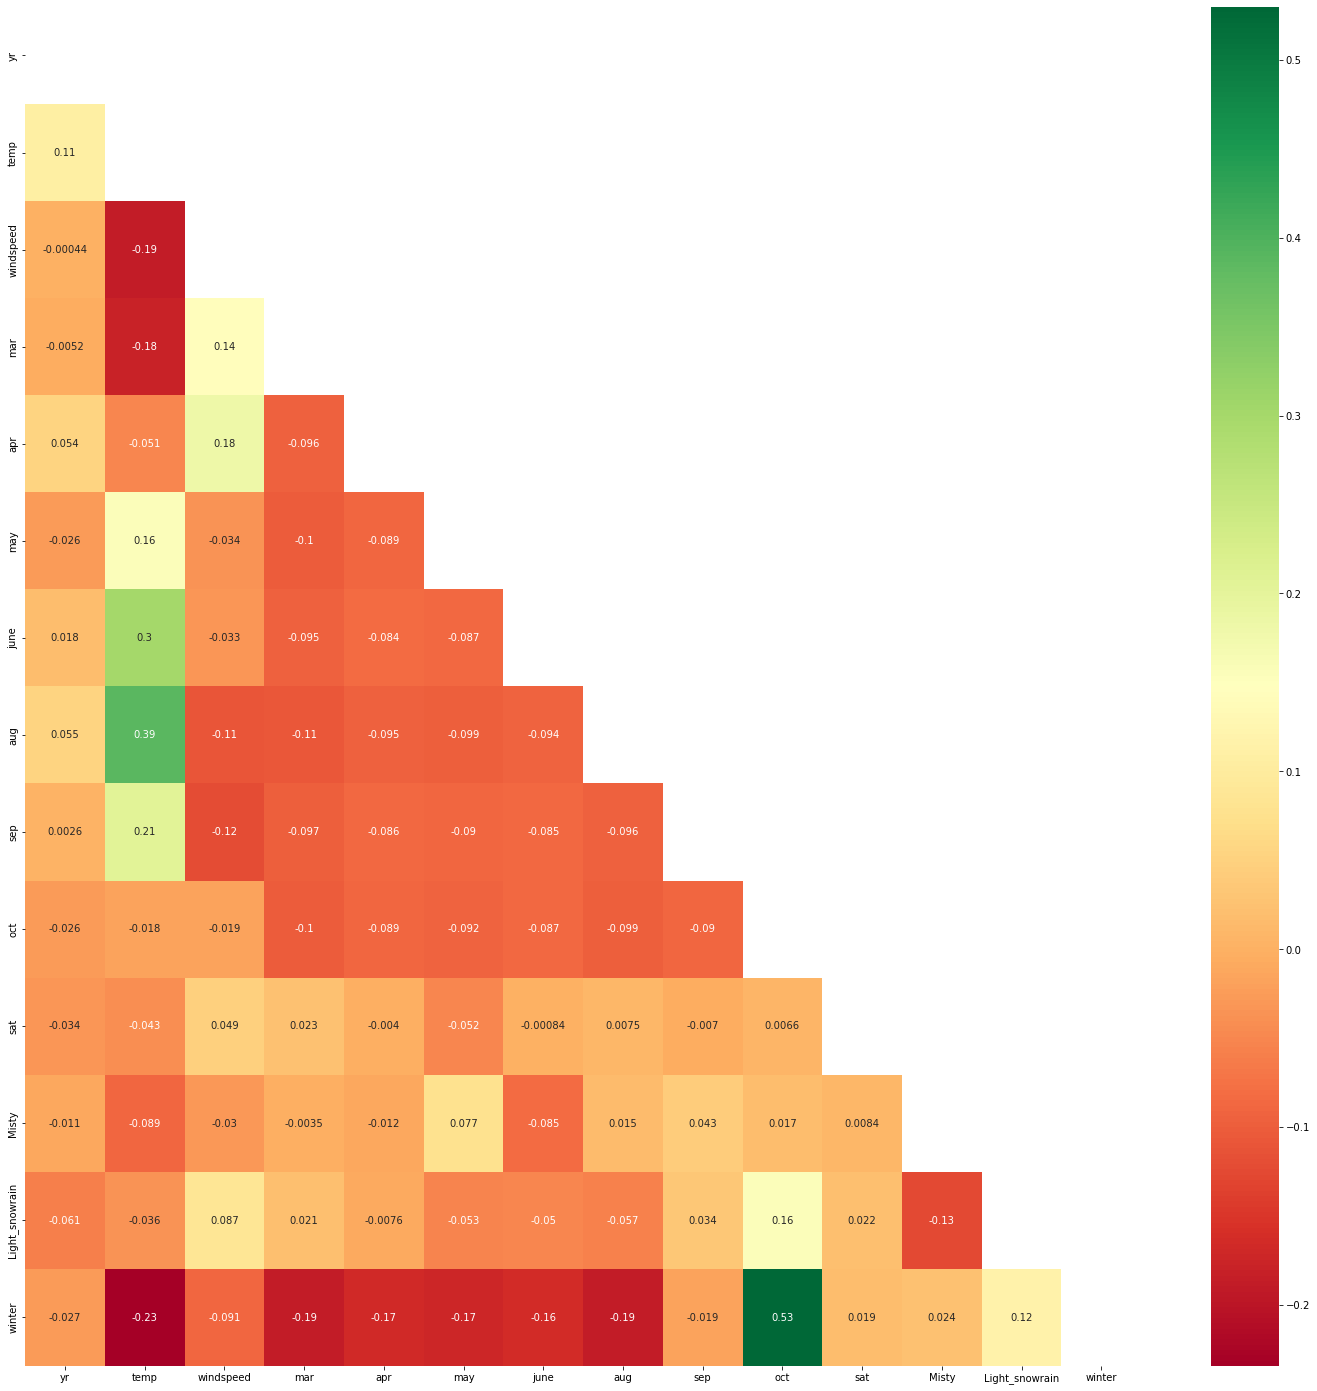

In [92]:
# Checking for the correlation 
plt.figure(figsize = (25 , 25))
matrix = np.triu(X_train_new.corr())
sns.heatmap(X_train_new.corr() , annot = True , cmap="RdYlGn" , mask = matrix)
plt.show()

In [93]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['oct'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,6.48
2,windspeed,3.49
0,yr,2.02
7,aug,1.80
12,winter,1.63
6,june,1.57
10,Misty,1.50
5,may,1.47
8,sep,1.41
4,apr,1.33




VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.


In [94]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.67e-181
Time:                        18:10:59   Log-Likelihood:                 490.81
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     496   BIC:                            -894.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1176      0.017      6.

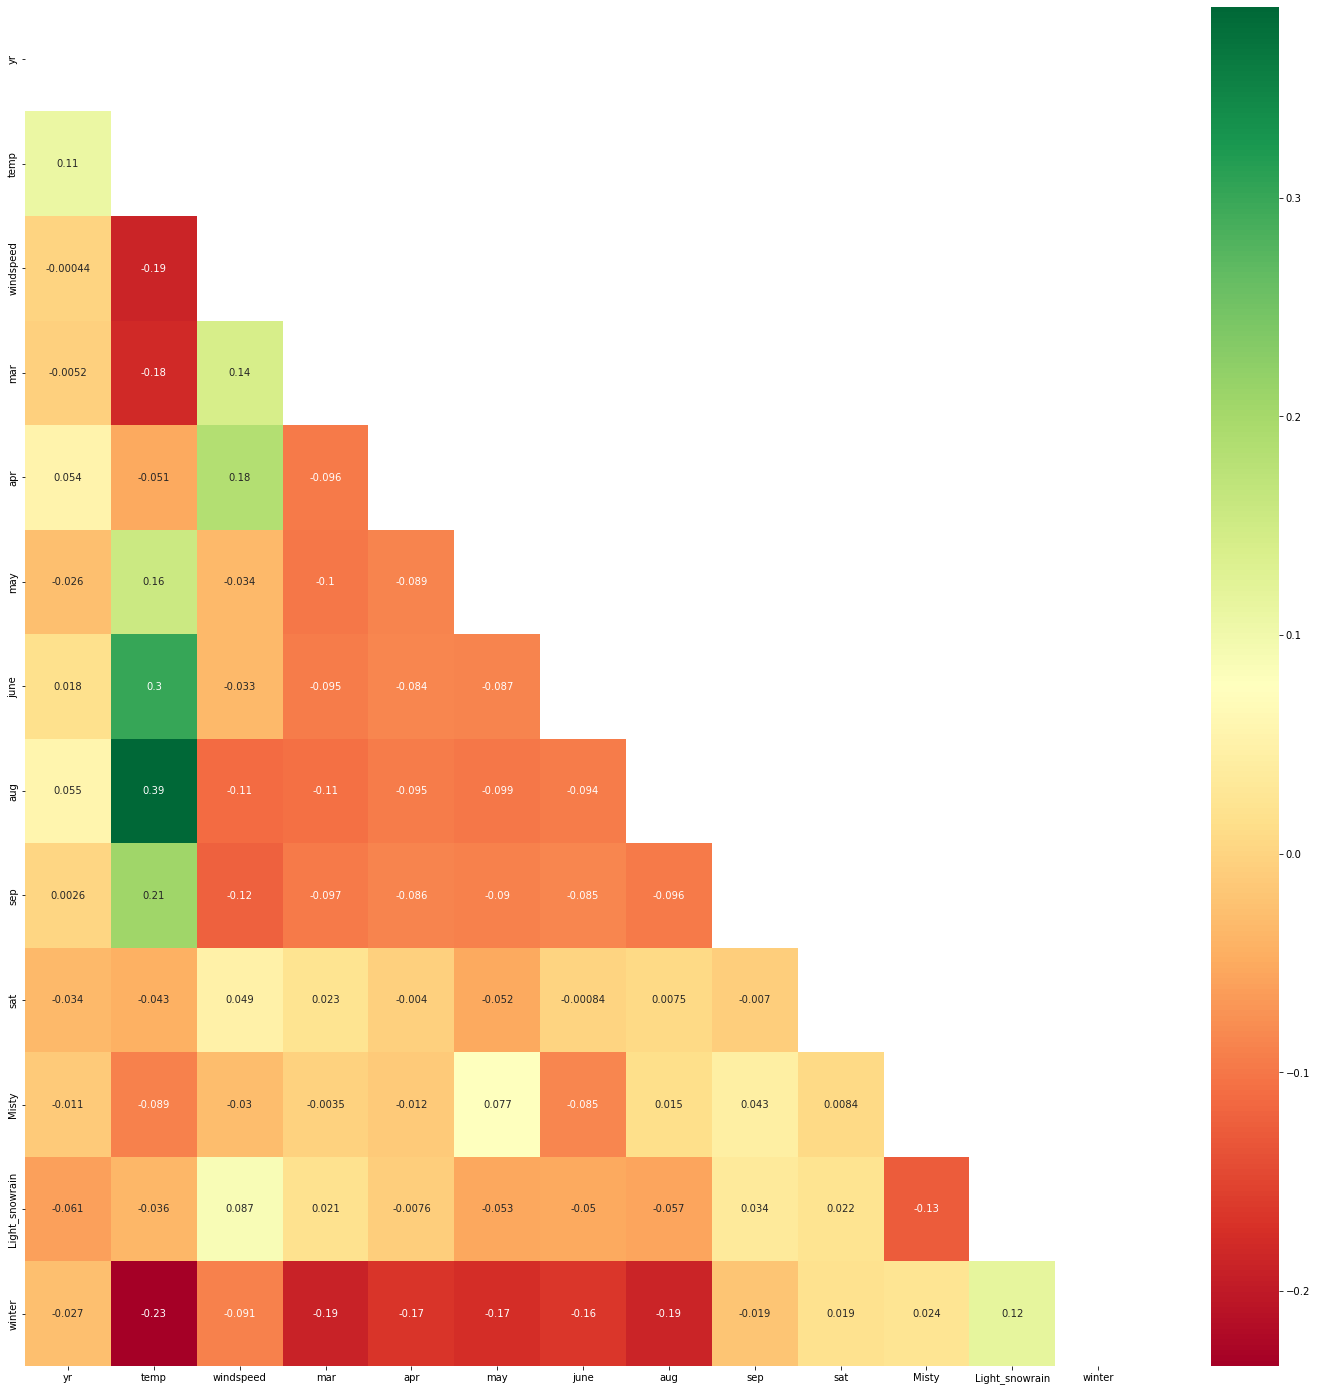

In [95]:
# Checking for the correlation 
plt.figure(figsize = (25 , 25))
matrix = np.triu(X_train_new.corr())
sns.heatmap(X_train_new.corr() , annot = True , cmap="RdYlGn" , mask = matrix)
plt.show()

In [96]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['aug', 'june'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,3.67
2,windspeed,3.44
0,yr,2.02
8,Misty,1.49
10,winter,1.38
3,mar,1.23
4,apr,1.21
5,may,1.21
6,sep,1.19
7,sat,1.18


In [97]:
# Building 4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4= sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.29e-178
Time:                        18:11:26   Log-Likelihood:                 477.45
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     498   BIC:                            -880.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1093      0.018      6.

### Observations
- We can consider the above model i.e lr_4, as it seems to have very low multicolinearity between the predictors and the p-- -values for all the predictors seems to be significant.
- F-Statistics value of 207.5 (which is greater than 1)
- Durbin watson is 1.960 which indicates that there is no autocorrelation

In [99]:
# Checking the parameters and their coefficient values
lr_4.params

const             0.109343
yr                0.232587
temp              0.578253
windspeed        -0.162468
mar               0.051274
apr               0.091662
may               0.083925
sep               0.089968
sat               0.024036
Misty            -0.075187
Light_snowrain   -0.280485
winter            0.126872
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [100]:
X_train_lm_4

,const,yr,temp,windspeed,mar,apr,may,sep,sat,Misty,Light_snowrain,winter
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,1,1,0,0
728,1.0,1,0.245101,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,1,1,0,0
111,1.0,0,0.345824,0.380981,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,0,0,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,0,0,1,1,0,1
79,1.0,0,0.462664,0.529881,1,0,0,0,0,1,0,0


In [101]:
y_train_pred = lr_4.predict(X_train_lm_4)


Normality of error terms

Text(0.5, 0, 'Errors')

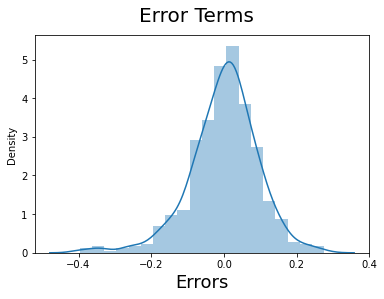

In [102]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

### Multi Colinearity

In [103]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,3.67
2,windspeed,3.44
0,yr,2.02
8,Misty,1.49
10,winter,1.38
3,mar,1.23
4,apr,1.21
5,may,1.21
6,sep,1.19
7,sat,1.18


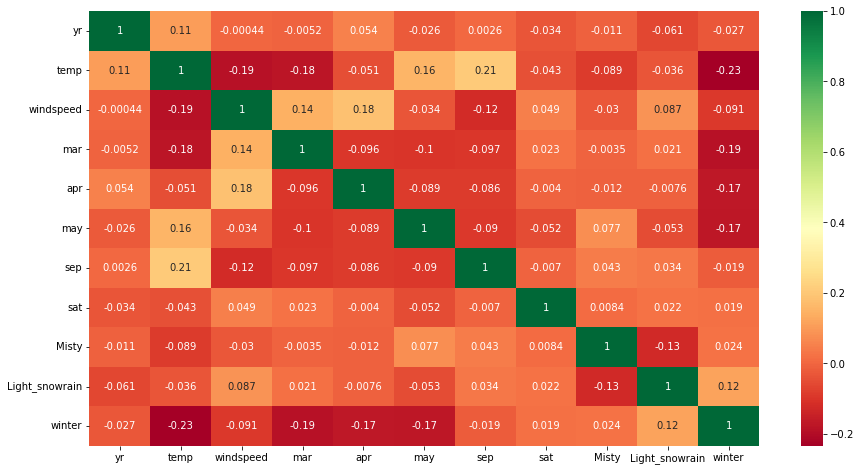

In [104]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.


Linearity

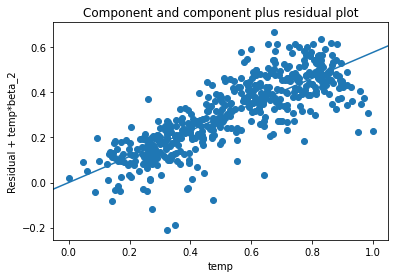

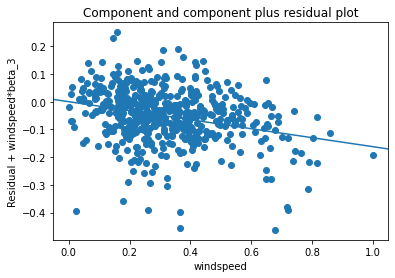

In [107]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

Homoscedasticity

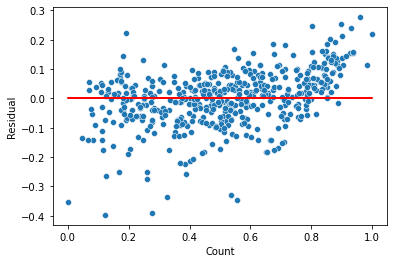

In [108]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.


<br>

Independence of residuals


<br>
Durbin-Watson value of final model lr_4 is 2.051, which signifies there is no autocorrelation.


## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [109]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,month_first_20,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,4,1,...,0,0,0,0,0,1,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,20,1,...,0,1,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,27,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,10,1,...,0,1,0,0,0,0,0,0,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,2,1,...,0,0,1,0,0,0,0,1,0,0


In [110]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,month_first_20,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
184,0,1,0,0.831783,0.769660,63.7917,0.084219,0.692706,4,1,...,0,0,0,0,0,1,0,0,1,0
535,1,0,1,0.901354,0.842587,59.2083,0.153728,0.712034,20,1,...,0,1,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,81.2917,0.334206,0.303382,27,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,42.4167,0.339570,0.547400,10,1,...,0,1,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,30.5000,0.537414,0.569029,2,1,...,0,0,1,0,0,0,0,1,0,0


In [111]:
df_test.describe()

,yr,temp,atemp,hum,windspeed,cnt,day,month_first_20,month_last_10,feb,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.558718,0.532847,61.934025,0.313293,0.522154,16.018182,0.663636,0.336364,0.100000,...,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273,0.263636,0.245455,0.236364
std,0.500809,0.233187,0.217401,14.429542,0.159584,0.219163,8.555467,0.473542,0.473542,0.300684,...,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248,0.441609,0.431338,0.425817
min,0.000000,0.046591,0.025950,25.416700,-0.042808,0.048205,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.355429,0.344870,51.354200,0.198843,0.378595,8.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.558172,0.544652,60.708350,0.300126,0.524678,15.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.755981,0.713308,72.179375,0.402718,0.677750,24.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,0.984424,0.980934,97.250000,0.807474,0.963300,31.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
y_test = df_test.pop('cnt')
X_test = df_test

In [113]:
col1 = X_train_new.columns
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [114]:
y_pred = lr_4.predict(X_test_lm_4)

In [115]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7865

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

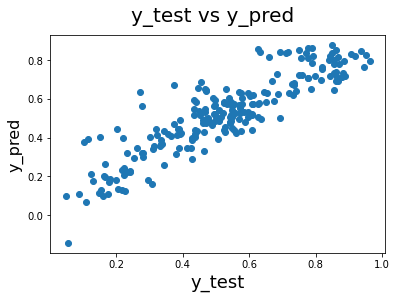

In [116]:
#Let's now plot the graph for actual versus predicted values.

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [117]:
round(lr_4.params,4)

const             0.1093
yr                0.2326
temp              0.5783
windspeed        -0.1625
mar               0.0513
apr               0.0917
may               0.0839
sep               0.0900
sat               0.0240
Misty            -0.0752
Light_snowrain   -0.2805
winter            0.1269
dtype: float64

In [118]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7752


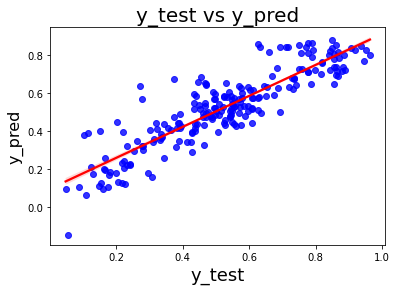

In [119]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.821
- Test dataset R^2           : 0.7865
- Train dataset Adjusted R^2 : 0.817   
- Test dataset Adjusted R^2  : 0.7752 

Demand of bikes depend on year, temp, windspeed, mar, apr, may, sep, sat, Misty, Light_snowrain, winter